In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
print("Modulos importados")

Modulos importados


In [4]:
# Cargar el dataset
df = pd.read_csv("csv/ml-32m/ratings.csv")

# Vista inicial
df.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [6]:
# Estadísticas descriptivas
df.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


In [7]:
# Estadisticas varias
# Número de usuarios y películas únicos
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()

# Estadísticas de ratings
rating_min = df['rating'].min()
rating_max = df['rating'].max()
rating_mean = df['rating'].mean()

# Rango de tiempo (de timestamp a fecha)
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
date_min = df['date'].min()
date_max = df['date'].max()

# Mostrar resultados
print(f'Usuarios únicos: {num_users:,}')
print(f'Películas únicas: {num_movies:,}')
print(f'Rating mínimo: {rating_min}')
print(f'Rating máximo: {rating_max}')
print(f'Rating promedio: {rating_mean:.2f}')
print(f'Rango temporal: {date_min.date()} → {date_max.date()}')

Usuarios únicos: 200,948
Películas únicas: 84,432
Rating mínimo: 0.5
Rating máximo: 5.0
Rating promedio: 3.54
Rango temporal: 1995-01-09 → 2023-10-13


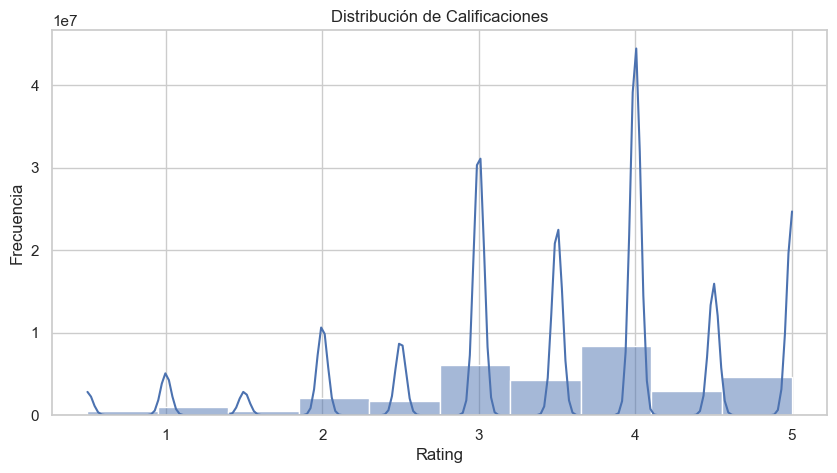

In [8]:
# Distribución de calificaciones
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribución de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

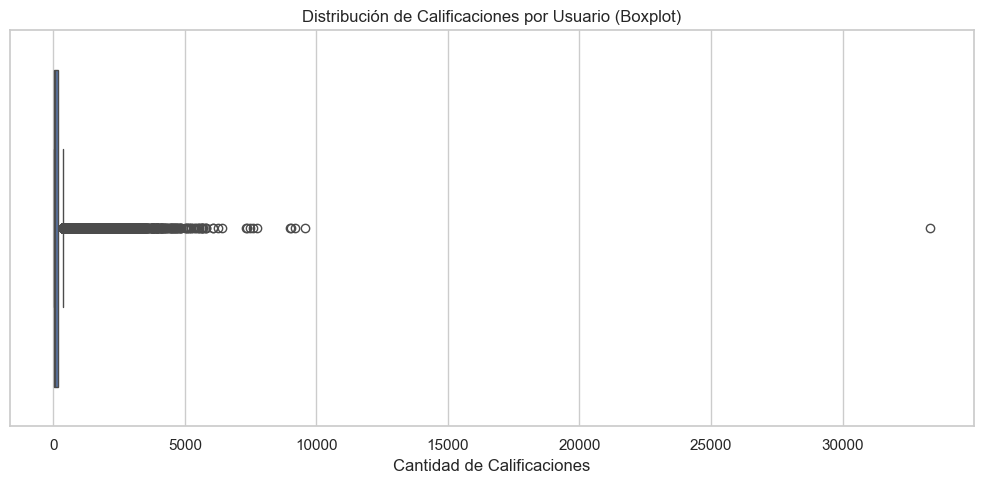

In [9]:
user_counts = df['userId'].value_counts()
sns.boxplot(x=user_counts)
plt.title("Distribución de Calificaciones por Usuario (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()


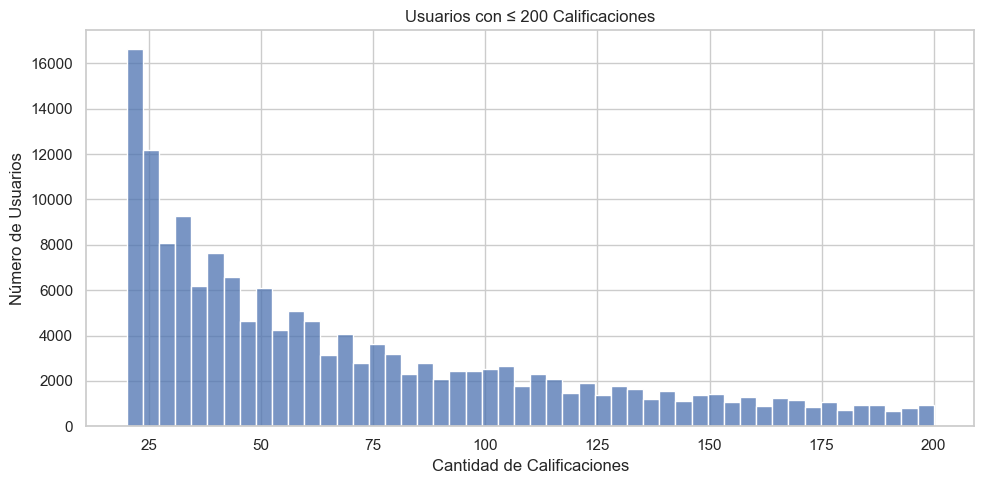

In [10]:
user_counts_trimmed = user_counts[user_counts <= 200]
sns.histplot(user_counts_trimmed, bins=50, kde=False)
plt.title("Usuarios con ≤ 200 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("Número de Usuarios")
plt.tight_layout()
plt.show()


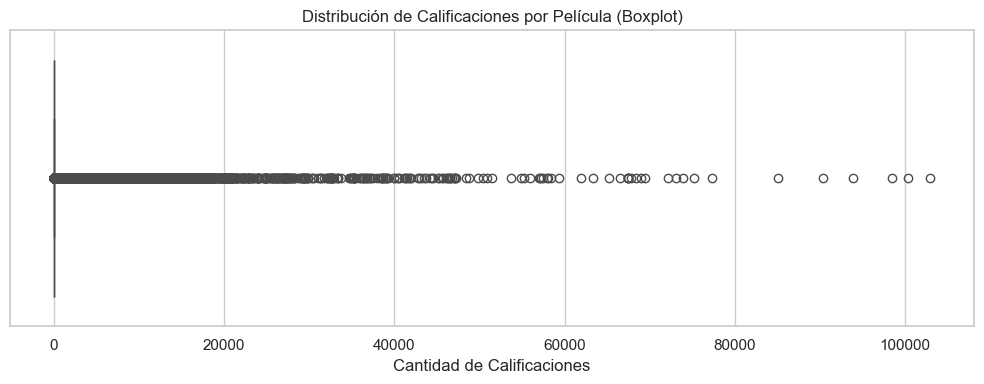

In [11]:
movie_counts = df['movieId'].value_counts()
plt.figure(figsize=(10, 4))
sns.boxplot(x=movie_counts)
plt.title("Distribución de Calificaciones por Película (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()

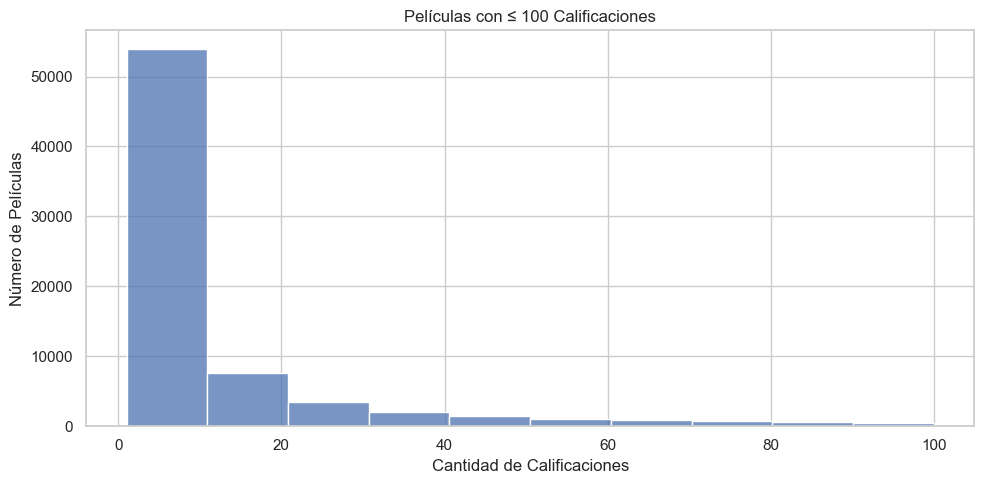

In [12]:
movie_counts_trimmed = movie_counts[movie_counts <= 100]

plt.figure(figsize=(10, 5))
sns.histplot(movie_counts_trimmed, bins=10, kde=False)
plt.title("Películas con ≤ 100 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("Número de Películas")
plt.tight_layout()
plt.show()

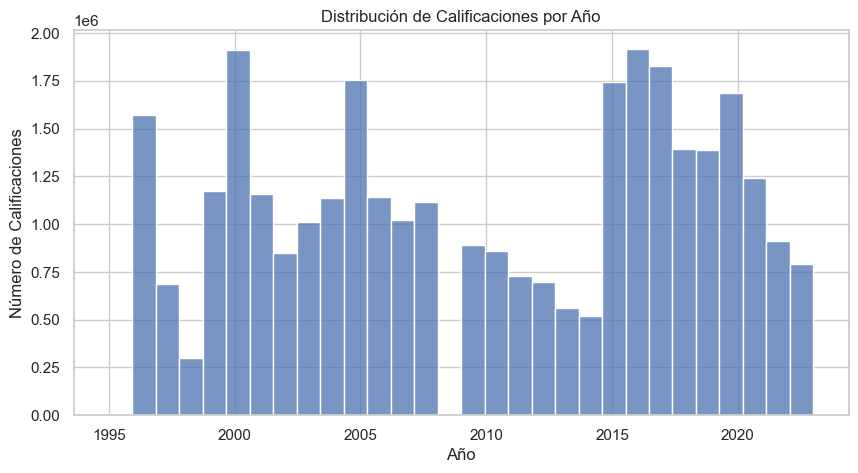

In [13]:
# Conversión de timestamp a fecha
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year

# Evolución de calificaciones por año
sns.histplot(df['year'], bins=30, kde=False)
plt.title("Distribución de Calificaciones por Año")
plt.xlabel("Año")
plt.ylabel("Número de Calificaciones")
plt.show()

# Analisis estadistico

In [14]:
# Estadísticas generales del rating
rating_stats = df['rating'].describe()
print("Estadísticas de Ratings:")
print(rating_stats)

# Desviación estándar
std_rating = df['rating'].std()
print("\nDesviación estándar del rating:", round(std_rating, 4))

# Número total de usuarios únicos
num_users = df['userId'].nunique()
print("\nTotal de usuarios únicos:", num_users)

# Número total de ítems únicos
num_items = df['movieId'].nunique()
print("Total de películas únicas:", num_items)

# Ítem más consumido
top_item = df['movieId'].value_counts().idxmax()
top_item_count = df['movieId'].value_counts().max()
print("\nPelícula más calificada:", top_item, "con", top_item_count, "calificaciones")

# Ítem menos consumido
bottom_item = df['movieId'].value_counts().idxmin()
bottom_item_count = df['movieId'].value_counts().min()
print("Película menos calificada:", bottom_item, "con", bottom_item_count, "calificación")

# Usuario más activo
top_user = df['userId'].value_counts().idxmax()
top_user_count = df['userId'].value_counts().max()
print("\nUsuario más activo:", top_user, "con", top_user_count, "ratings")

# Usuario menos activo
bottom_user = df['userId'].value_counts().idxmin()
bottom_user_count = df['userId'].value_counts().min()
print("Usuario menos activo:", bottom_user, "con", bottom_user_count, "rating")


Estadísticas de Ratings:
count    3.200020e+07
mean     3.540396e+00
std      1.058986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Desviación estándar del rating: 1.059

Total de usuarios únicos: 200948
Total de películas únicas: 84432

Película más calificada: 318 con 102929 calificaciones
Película menos calificada: 182833 con 1 calificación

Usuario más activo: 175325 con 33332 ratings
Usuario menos activo: 18648 con 20 rating


# Analisis de outliers

In [15]:
# Usuarios que solo usan una calificación
user_rating_unique_counts = df.groupby('userId')['rating'].nunique()

# Usuarios que solo votan con 1 calificación única (posible outlier)
outlier_users = user_rating_unique_counts[user_rating_unique_counts == 1]
print(f"Usuarios que solo usan un mismo valor de rating: {len(outlier_users)}")

# ¿Qué calificación específica usaron?
outlier_details = df[df['userId'].isin(outlier_users.index)].groupby('userId')['rating'].first().value_counts()
print("Distribución de rating único entre los outliers:")
print(outlier_details)

# Usuarios que solo dan calificaciones altas o bajas (por ejemplo, solo 5.0 o solo 0.5)
only_high = outlier_details.get(5.0, 0)
only_low = outlier_details.get(0.5, 0)


Usuarios que solo usan un mismo valor de rating: 401
Distribución de rating único entre los outliers:
rating
5.0    359
0.5     14
4.0     10
3.0     10
1.0      5
2.5      2
3.5      1
Name: count, dtype: int64


# Experimentos

In [16]:
# 🔹 2. Convertir timestamp
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

In [17]:
# 🔹 3. Codificar temporada, fin de semana y feriado
def get_season(month):
    if month in [12, 1, 2]:
        return 'invierno'
    elif month in [3, 4, 5]:
        return 'primavera'
    elif month in [6, 7, 8]:
        return 'verano'
    else:
        return 'otoño'

df['season'] = df['month'].apply(get_season)

In [18]:
df['is_weekend'] = df['weekday'].isin([5, 6])


In [19]:
ecu_holidays = holidays.Ecuador(years=range(df['year'].min(), df['year'].max() + 1))
df['is_holiday'] = df['date'].isin(ecu_holidays)
print(df[['season', 'is_weekend', 'is_holiday']].describe(include='all'))

C:\Users\s3_xc\AppData\Local\Temp\ipykernel_5556\1763053412.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(ecu_holidays)


          season is_weekend is_holiday
count   32000204   32000204   32000204
unique         4          2          2
top     invierno      False      False
freq     8165101   22432379   32000192


In [20]:
# 🔹 4. Codificación booleana y categórica
df['season_encoded'] = df['season'].map({'invierno': 0, 'primavera': 1, 'verano': 2, 'otoño': 3})
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)


In [21]:
# 🔹 5. Calcular rating_previous
df = df.sort_values(['userId', 'timestamp'])
df['rating_previous'] = df.groupby('userId')['rating'].shift().fillna(0)

In [22]:
# 🔹 Asegurar que week_of_year sea int para el merge
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

# 🔹 Calcular consumo semanal
consumo = df.groupby(['userId', 'week_of_year']).size().reset_index(name='consumo_semanal_usuario')
df = pd.merge(df, consumo, on=['userId', 'week_of_year'], how='left')


df['antiguedad_rating'] = 2025 - df['year']
df['diferencia_rating_anterior'] = df['rating'] - df['rating_previous']
df['diferencia_rating_anterior'].fillna(0, inplace=True)


C:\Users\s3_xc\AppData\Local\Temp\ipykernel_5556\648649064.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diferencia_rating_anterior'].fillna(0, inplace=True)


In [23]:
# 🔹 7. Ingeniería UMAP
temporal_features = ['year', 'month', 'weekday', 'season_encoded', 'is_weekend', 'is_holiday', 'rating_previous']
X_scaled = StandardScaler().fit_transform(df[temporal_features])

In [24]:
# UMAP sobre muestra aleatoria
sample_size = 100_000
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

In [25]:
reducer = umap.UMAP(n_components=3, random_state=42, init='random', n_neighbors=15, min_dist=0.1)
reducer.fit(X_sample)
X_umap_full = reducer.transform(X_scaled)

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [26]:
# Agregar latentes al dataframe
df[['temporal_1', 'temporal_2', 'temporal_3']] = X_umap_full

# 🔹 8. Seleccionar columnas finales para la RNN
columns_to_keep = [
    'userId', 'movieId',
    'temporal_1', 'temporal_2', 'temporal_3',
    'rating', 'timestamp',
    'rating_previous', 'is_weekend', 'season_encoded', 'is_holiday',
    'year', 'month', 'weekday',
    'consumo_semanal_usuario', 'antiguedad_rating', 'diferencia_rating_anterior'
]


In [28]:
df_rnn_final = df[columns_to_keep]

# 🔹 9. Guardar dataset final
df_rnn_final.to_csv("dataset_final_completo.csv", index=False)
print("✅ Dataset RNN FINAL generado exitosamente.")

✅ Dataset RNN FINAL generado exitosamente.
